In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])

print(df.shape)

df['MED20']=df['MED20'].astype(float)

df['MED20'].head()


C:\Users\dmoll\AppData\Local\Temp\ipykernel_13500\2257726016.py:7: DtypeWarning: Columns (1,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])


(34955, 738)


0    24820.0
1    23220.0
2    21070.0
3    24380.0
4        NaN
Name: MED20, dtype: float64

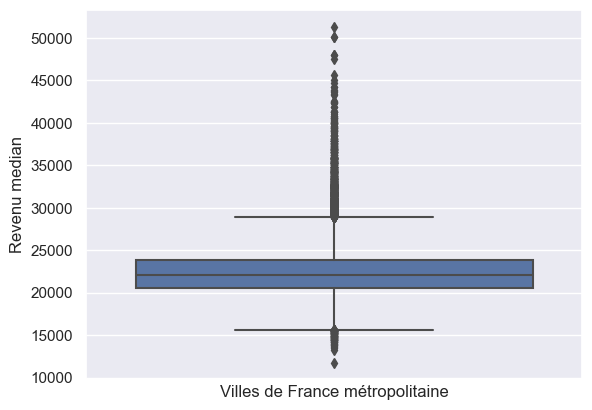

In [146]:
### REVENU MEDIAN / FRANCE METROPOLITAINE ###

sns.boxplot(y='MED20',data=df[(df.nom_region!='Guadeloupe') &
                    (df.nom_region!='Martinique') &
                    (df.nom_region!='Guyane') &
                    (df.nom_region!='La Réunion') &
                    (df.nom_region!='Mayotte')]
           )
plt.xticks([])
plt.xlabel('Villes de France métropolitaine')
plt.ylabel('Revenu median');


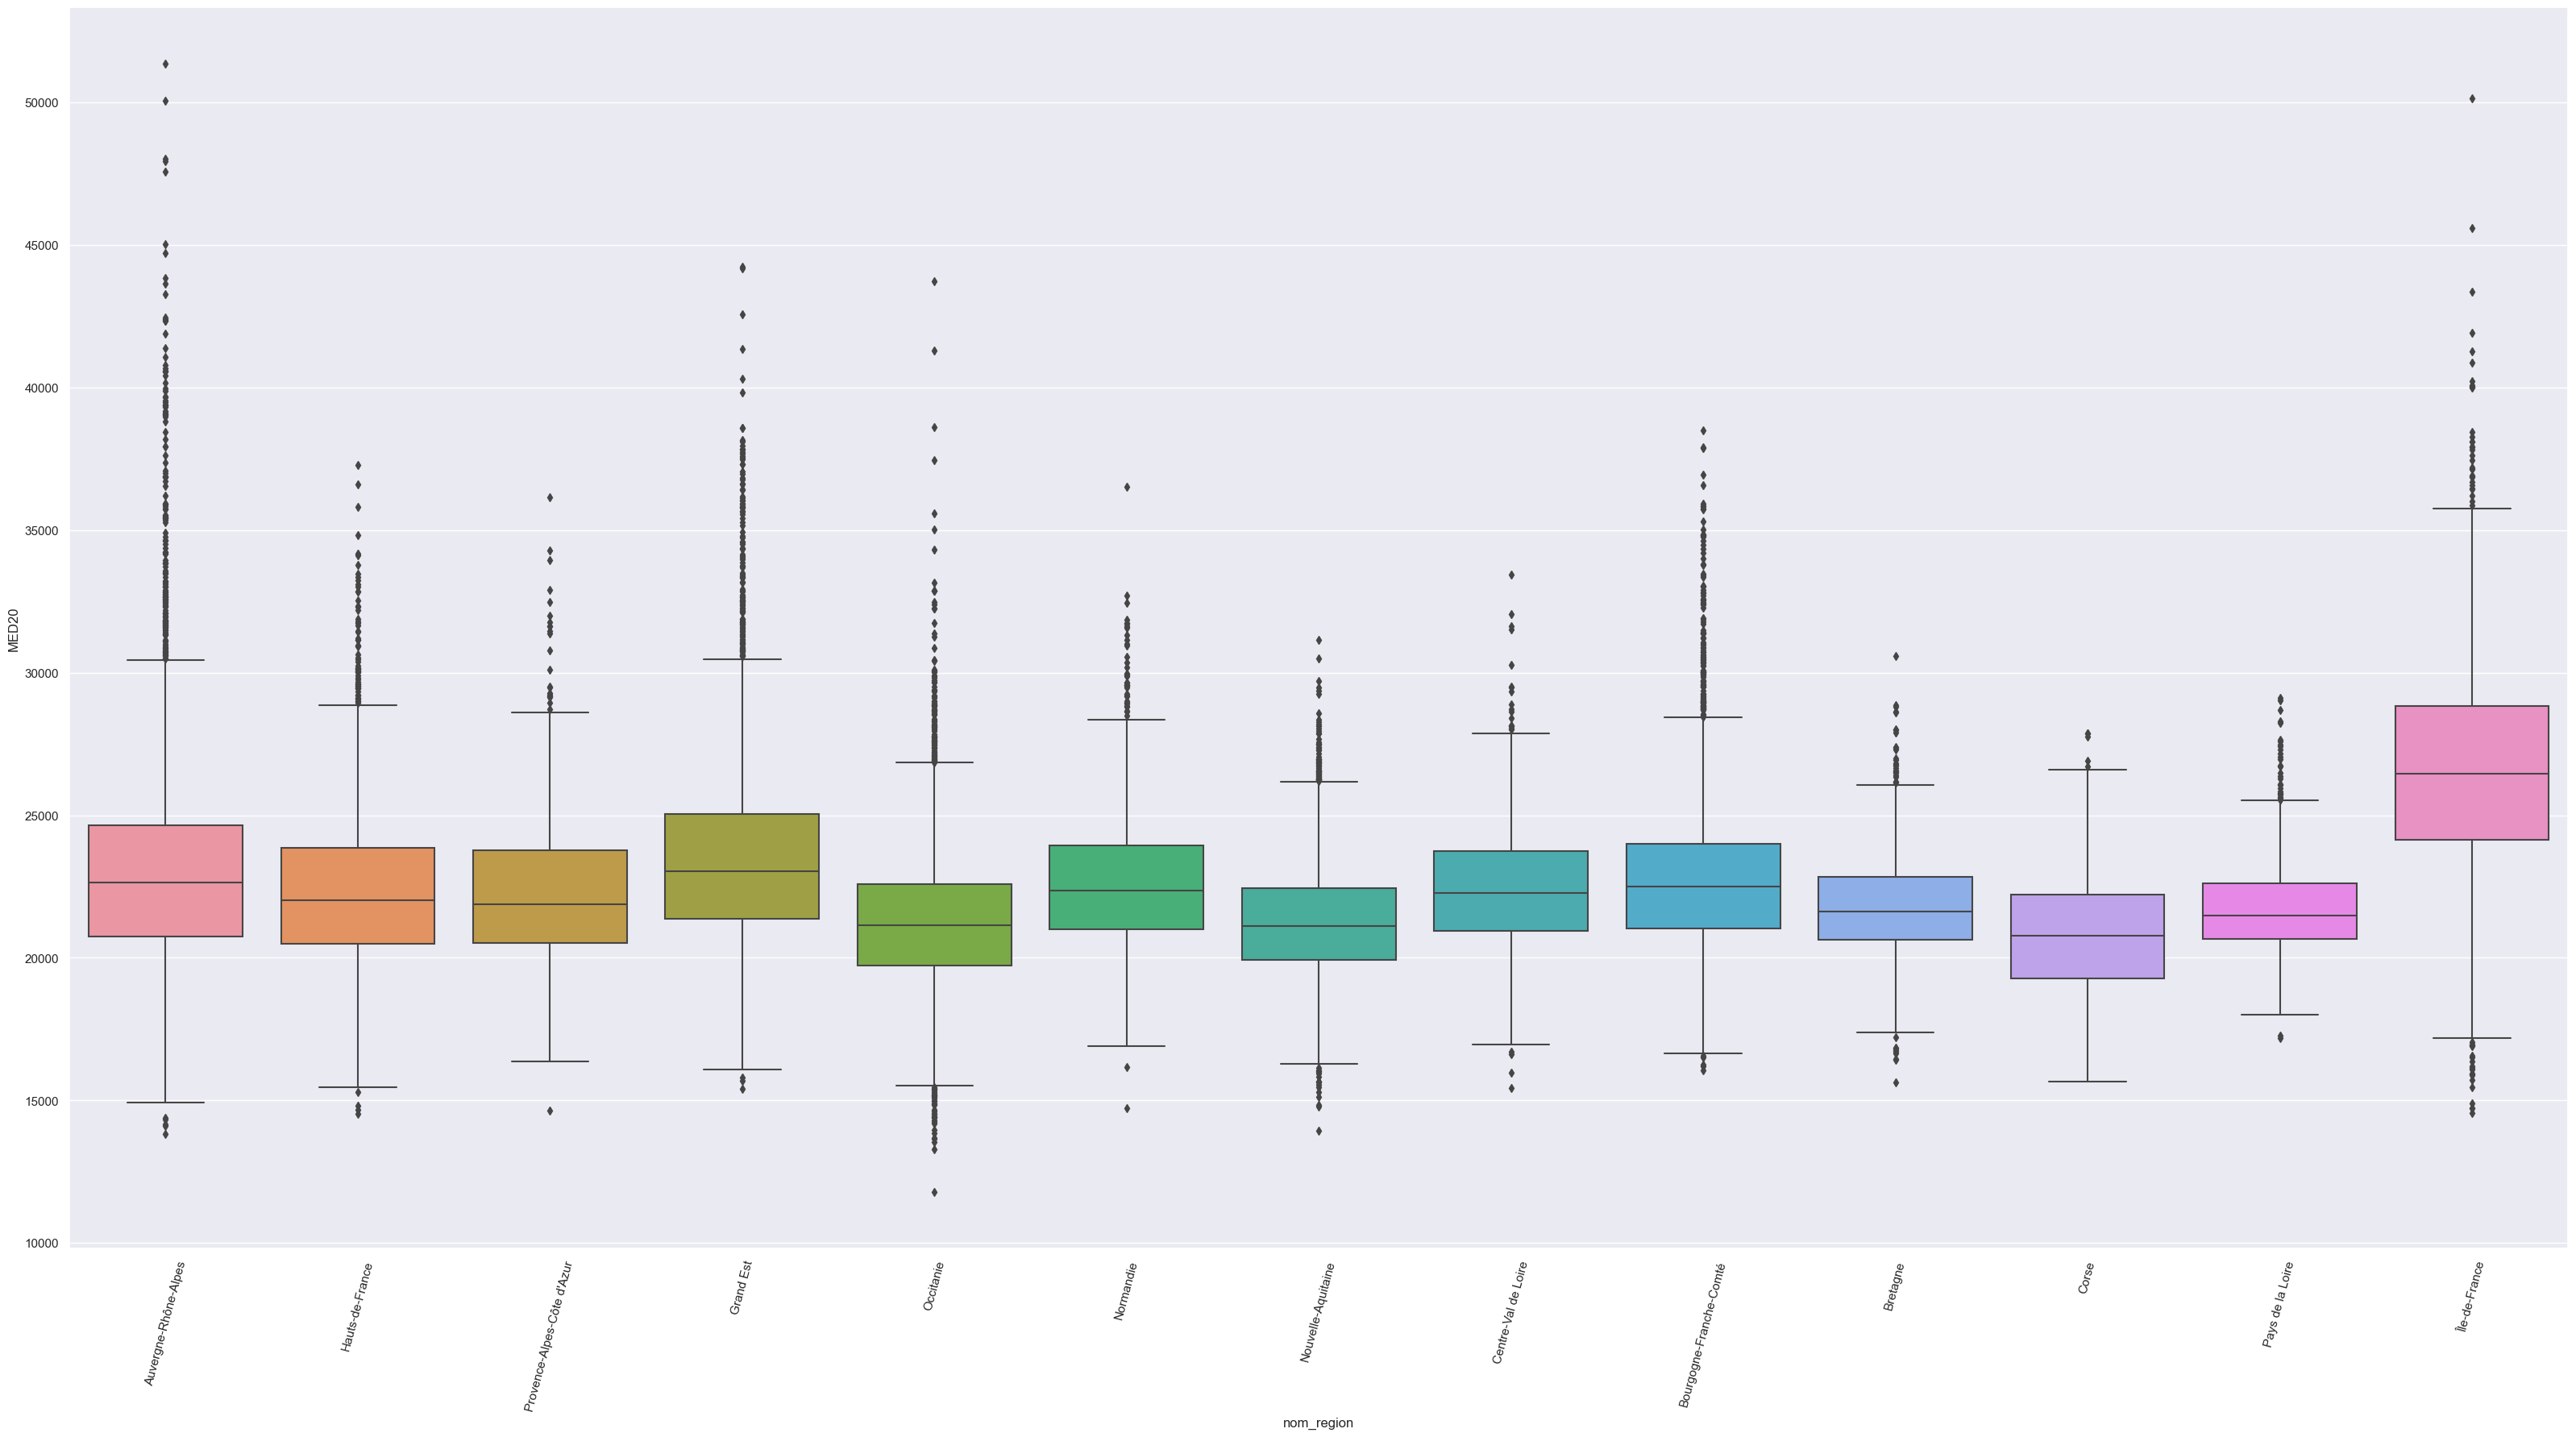

In [147]:
#### REVENU MEDIAN / VENTILE PAR REGION / FRANCE METROPOLITAINE ###

plt.figure(figsize=(40,20))
sns.boxplot(x='nom_region', y='MED20',
            data=df[(df.nom_region!='Guadeloupe') &
                    (df.nom_region!='Martinique') &
                    (df.nom_region!='Guyane') &
                    (df.nom_region!='La Réunion') &
                    (df.nom_region!='Mayotte')]
           )
                                
plt.xticks(rotation=75);


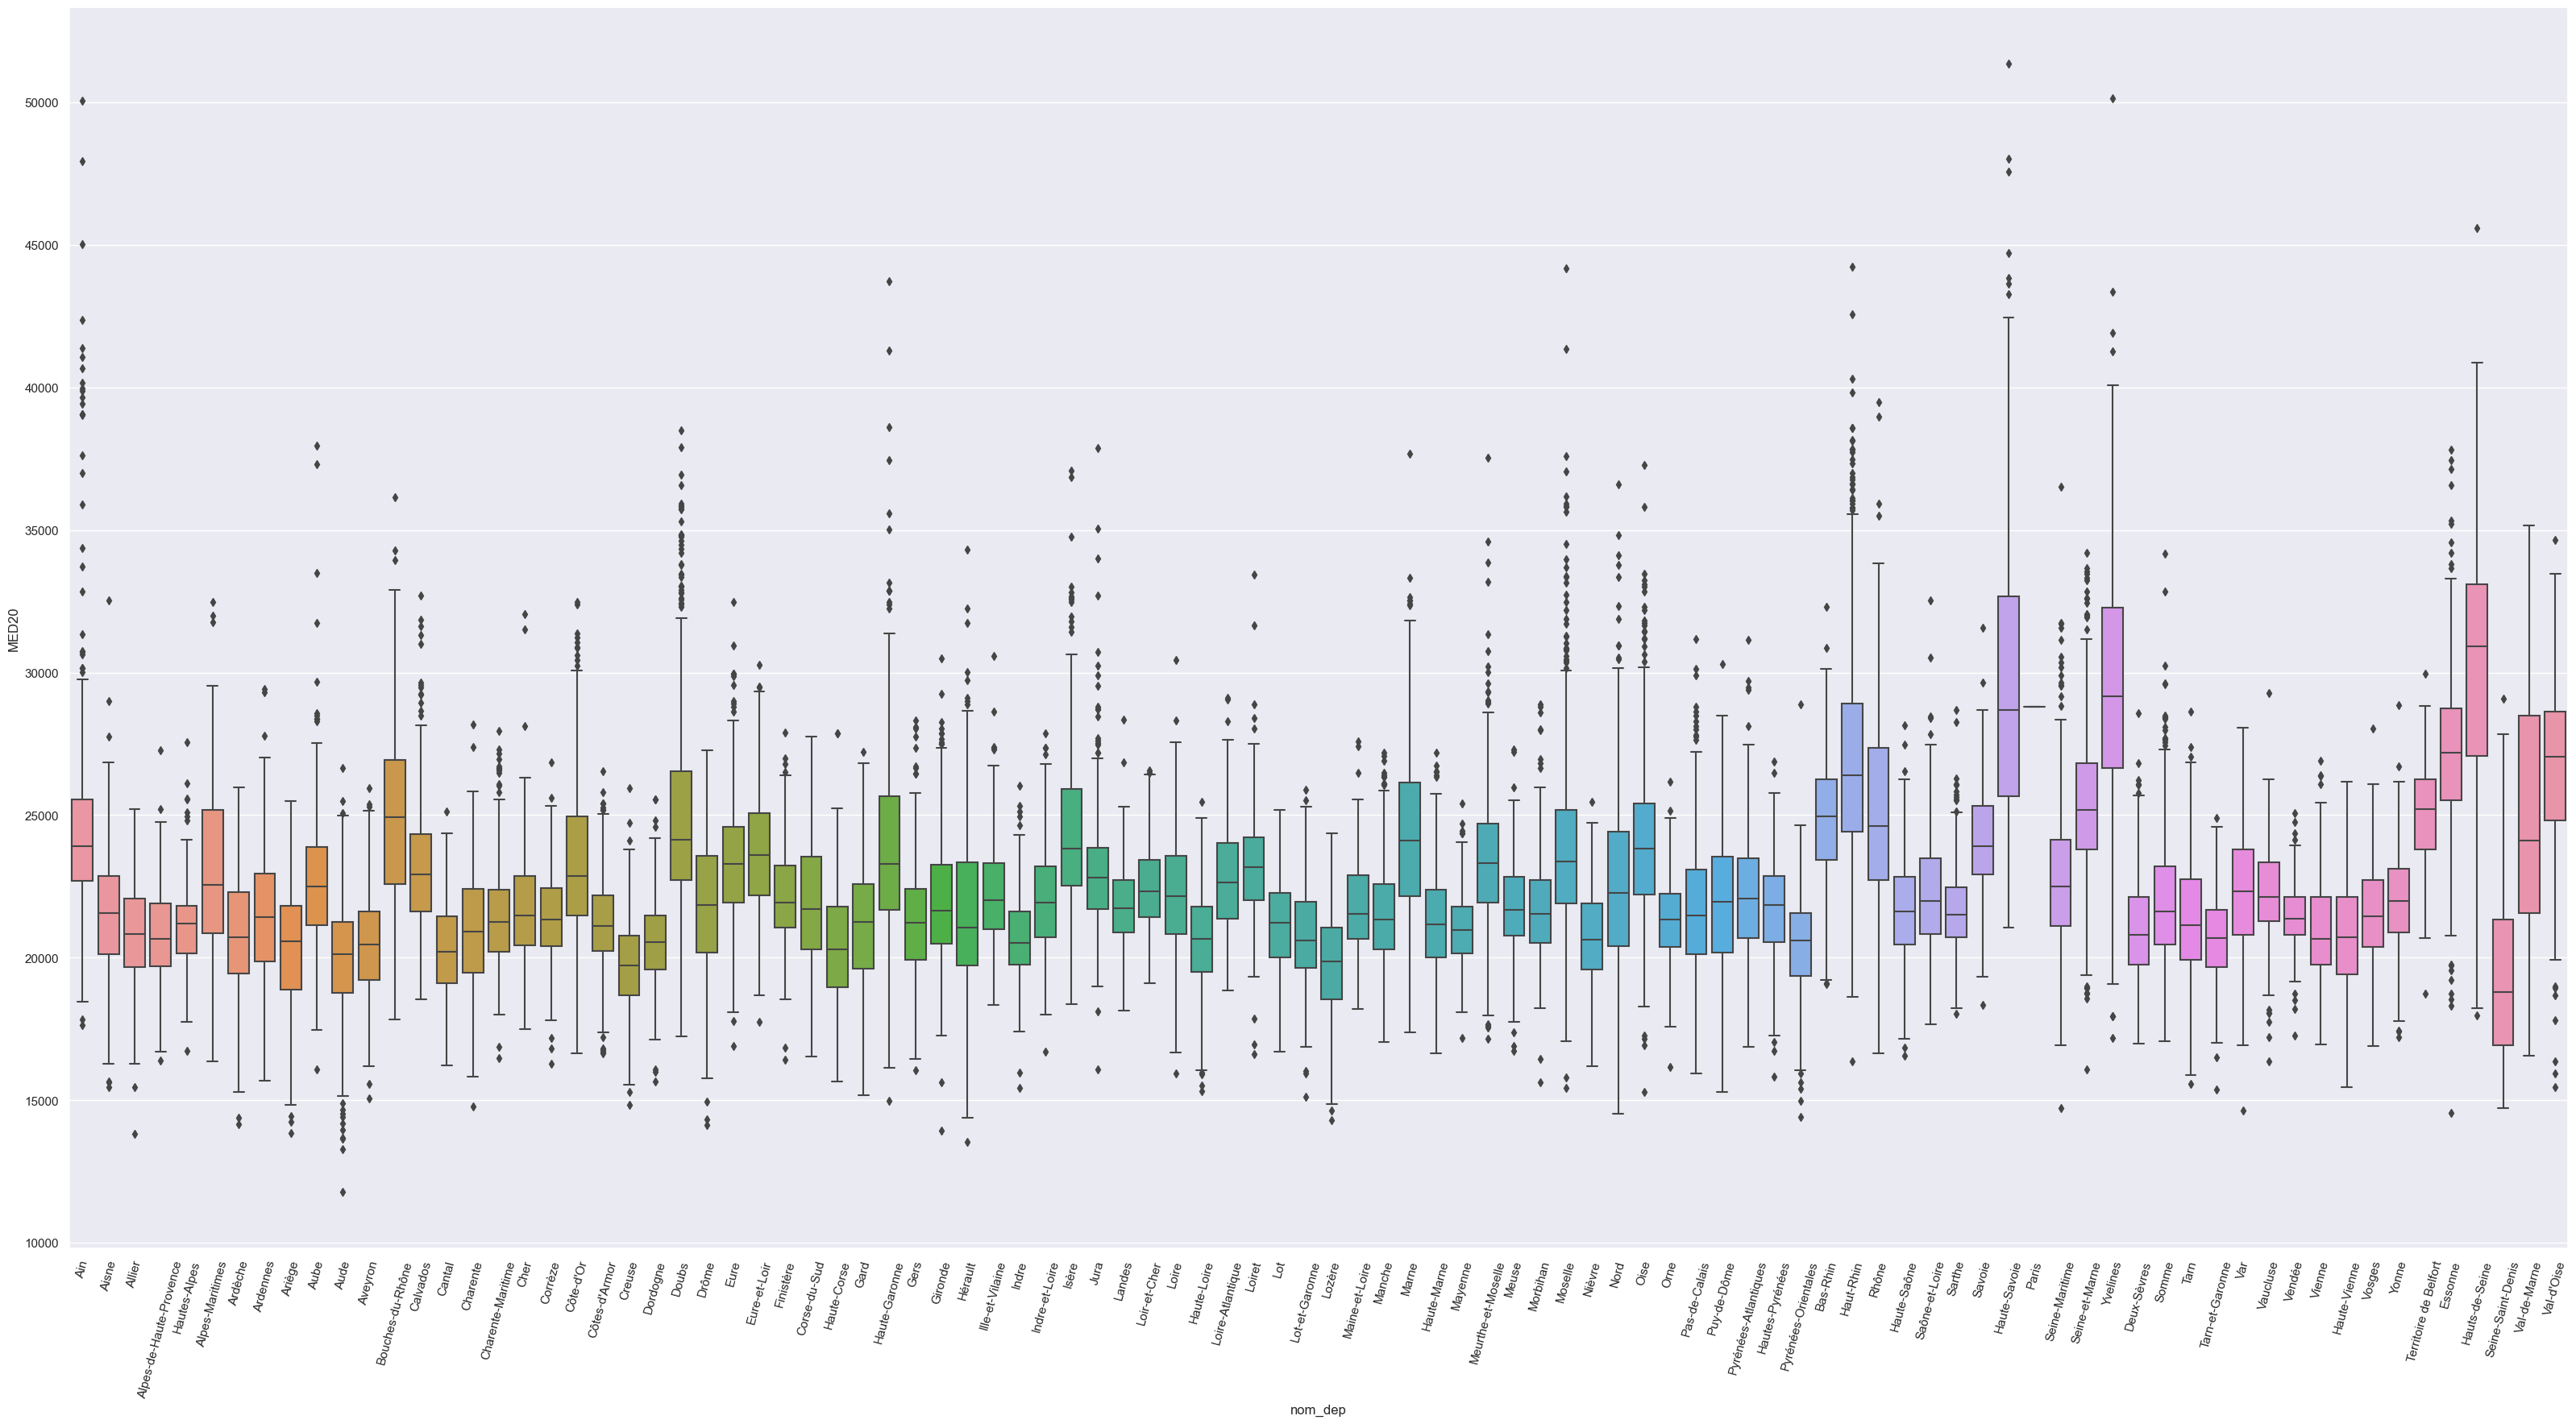

In [156]:
### REVENU MEDIAN / VENTILE PAR DEPARTEMENT / FRANCE  ###

plt.figure(figsize=(40,20))
sns.boxplot(x='nom_dep', y='MED20',
            data=df[(df.nom_region!='Guadeloupe') &
                    (df.nom_region!='Martinique') &
                    (df.nom_region!='Guyane') &
                    (df.nom_region!='La Réunion') &
                    (df.nom_region!='Mayotte')]
           )

plt.xticks(rotation=75);

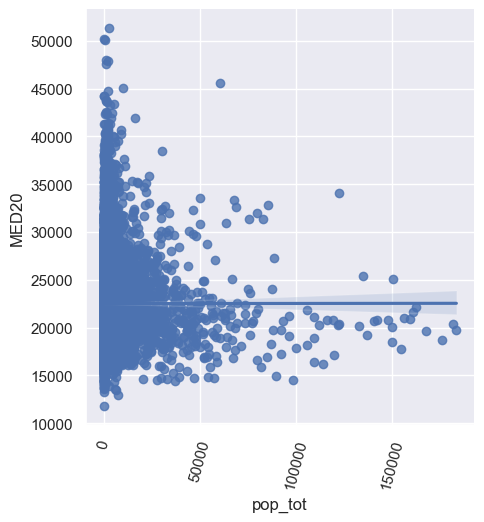

In [161]:
sns.lmplot(x='pop_tot', y='MED20',data=df[df.pop_tot<200000]);
plt.xticks(rotation=75);


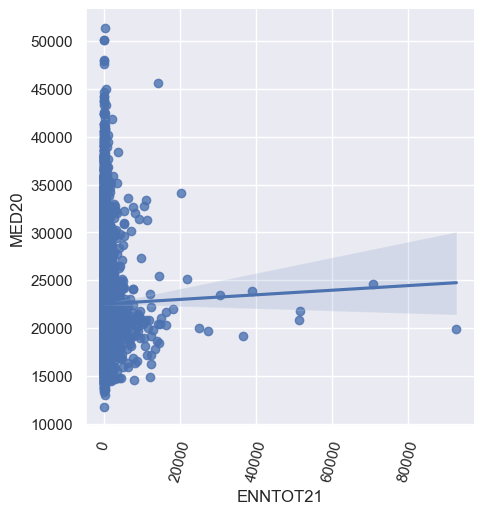

In [163]:
sns.lmplot(x='ENNTOT21', y='MED20',data=df[df.ENNTOT21<100000]);
plt.xticks(rotation=75);


In [15]:
### EDA DES DATA SUR LA PAUVRETE ###

df_prvte=df[[
            'nom_commune',
            'nom_dep',
            'nom_region',
            'NBMENFISC20',
            'NBPERSMENFISC20',
            'MED20',
            'PIMP20',
            'TP6020',
            'TP60AGE120',
            'TP60AGE220',
            'TP60AGE320',
            'TP60AGE420',
            'TP60AGE520',
            'TP60AGE620',
            'TP60TOL120',
            'TP60TOL220',
            'PACT20',
            'PTSA20',
            'PCHO20',
            'PBEN20',
            'PPEN20',
            'PPAT20',
            'PPSOC20',
            'PPFAM20',
            'PPMINI20',
            'PPLOGT20',
            'PIMPOT20',
            'D120',
            'D920',
            'RD20']]

print(df_prvte.shape)
print(df_prvte.isna().sum())
print(df_prvte.info())

(34955, 30)
nom_commune            0
nom_dep                0
nom_region             0
NBMENFISC20         3671
NBPERSMENFISC20     3671
MED20               3671
PIMP20             29643
TP6020             30630
TP60AGE120         34278
TP60AGE220         33575
TP60AGE320         33350
TP60AGE420         33704
TP60AGE520         33967
TP60AGE620         34512
TP60TOL120         32885
TP60TOL220         31799
PACT20             29649
PTSA20             29649
PCHO20             29649
PBEN20             29649
PPEN20             29649
PPAT20             29649
PPSOC20            29649
PPFAM20            29649
PPMINI20           29649
PPLOGT20           29649
PIMPOT20           29649
D120               29649
D920               29649
RD20               29649
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_commune      34

In [24]:
# le nbre de NaN est important, de nombreuses variables sont inexploitabls. Cependant la variable MED20 (mediane du niveau de vie en euro est exploitable )

df_prvte=df_prvte.iloc[:,:6]
df_prvte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_commune      34955 non-null  object 
 1   nom_dep          34955 non-null  object 
 2   nom_region       34955 non-null  object 
 3   NBMENFISC20      31284 non-null  float64
 4   NBPERSMENFISC20  31284 non-null  float64
 5   MED20            31284 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [25]:
df_prvte.head()

,nom_commune,nom_dep,nom_region,NBMENFISC20,NBPERSMENFISC20,MED20
0,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,331.0,842.0,24820.0
1,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,116.0,264.0,23220.0
2,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,6882.0,15358.0,21070.0
3,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,767.0,1939.0,24380.0
4,Ambléon,Ain,Auvergne-Rhône-Alpes,NaN,NaN,NaN


In [76]:
df_demoent=df[[
'ENNTOT21',
'ENNBE21',
'ENNFZ21',
'ENNGI21',
'ENNJZ21',
'ENNKZ21',
'ENNLZ21',
'ENNMN21',
'ENNOQ21',
'ENNRU21',
'ENCTOT21',
'ENCBE21',
'ENCFZ21',
'ENCGI21',
'ENCJZ21',
'ENCKZ21',
'ENCLZ21',
'ENCMN21',
'ENCOQ21',
'ENCRU21',
'ENCTOT20',
'ENCTOT19',
'ETNBE21',
'ETNFZ21',
'ETNGI21',
'ETNJZ21',
'ETNKZ21',
'ETNLZ21',
'ETNMN21',
'ETNOQ21',
'ETNRU21',
'ETCTOT21',
'ETCBE21',
'ETCFZ21',
'ETCGI21',
'ETCJZ21',
'ETCKZ21',
'ETCLZ21',
'ETCMN21',
'ETCOQ21',
'ETCRU21',
'ETCTOT20',
'ETCBE20',
'ETCFZ20',
'ETCGI20',
'ETCJZ20',
'ETCKZ20',
'ETCLZ20',
'ETCMN20',
'ETCOQ20',
'ETCRU20',
'ETCTOT19',
'ETCBE19',
'ETCFZ19',
'ETCGI19',
'ETCJZ19',
'ETCKZ19',
'ETCLZ19',
'ETCMN19',
'ETCOQ19',
'ETCRU19',
          
]]

In [77]:
df_demoent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ENNTOT21  34955 non-null  int64  
 1   ENNBE21   34955 non-null  int64  
 2   ENNFZ21   34955 non-null  int64  
 3   ENNGI21   34955 non-null  int64  
 4   ENNJZ21   34955 non-null  int64  
 5   ENNKZ21   34955 non-null  int64  
 6   ENNLZ21   34955 non-null  int64  
 7   ENNMN21   34955 non-null  int64  
 8   ENNOQ21   34955 non-null  int64  
 9   ENNRU21   34955 non-null  int64  
 10  ENCTOT21  34955 non-null  int64  
 11  ENCBE21   34955 non-null  int64  
 12  ENCFZ21   34955 non-null  int64  
 13  ENCGI21   34955 non-null  int64  
 14  ENCJZ21   34955 non-null  int64  
 15  ENCKZ21   34955 non-null  int64  
 16  ENCLZ21   34955 non-null  int64  
 17  ENCMN21   34955 non-null  int64  
 18  ENCOQ21   34955 non-null  int64  
 19  ENCRU21   34955 non-null  int64  
 20  ENCTOT20  34955 non-null  in